In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
np.set_printoptions(precision=4)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
df = pd.read_csv('games.csv')
df.head(5)
df = df.drop(['id', 'white_id', 'black_id', 'created_at', 'last_move_at', 'moves' ], axis = 1)
df = df[df['winner'] != 'draw']
df.columns
df.head(5)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5


In [3]:
def plotPie(column, title):
    fig,ax = plt.subplots(1,1)
    data = df[column].value_counts()
    plt.pie(data,autopct='%1.2f%%', labels=data.index)
    plt.title(title)
    plt.show()

def plotHist(column, title):
    if len(column) == 2:
        fig, ax = plt.subplots(1,2)
        ax[0].hist(df[column[0]], alpha=0.7, edgecolor='black')
        ax[0].set_title(title[0])
        ax[1].hist(df[column[1]], alpha=0.7, edgecolor='black')
        ax[1].set_title(title[1])
    else:
        plt.hist(df[column], alpha=0.7, edgecolor='black')
        plt.title(title)
    plt.style.use('seaborn-whitegrid')
    plt.show
    
def plotBar(column, title):
    data = df[column].value_counts()
    plt.bar(data.index, data)
    plt.title(title)
    plt.show

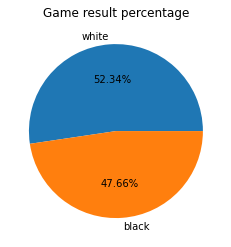

In [4]:
plotPie('winner', 'Game result percentage')

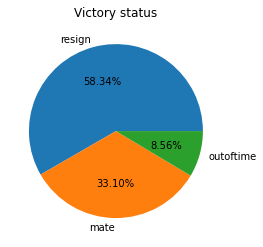

In [5]:
plotPie('victory_status', 'Victory status')

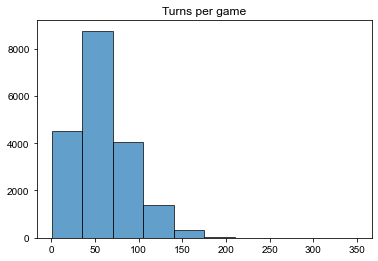

In [6]:
plotHist('turns', 'Turns per game')

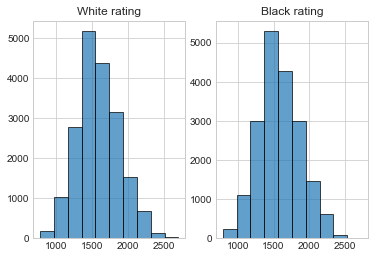

In [7]:
plotHist(['white_rating', 'black_rating'], ['White rating', 'Black rating'])

In [8]:
df['white_rating'].describe().round()


count    19108.0
mean      1594.0
std        290.0
min        784.0
25%       1395.0
50%       1564.0
75%       1788.0
max       2700.0
Name: white_rating, dtype: float64

In [9]:
df['black_rating'].describe().round()

count    19108.0
mean      1586.0
std        290.0
min        789.0
25%       1389.0
50%       1560.0
75%       1781.0
max       2723.0
Name: black_rating, dtype: float64

In [10]:
allRating = df['white_rating']
allRating = allRating.append(df['black_rating'])
allRating = pd.DataFrame({'rating':allRating}).reset_index()
allRating = allRating.drop('index',axis=1)
allRating.describe().round()

,rating
count,38216.0
mean,1590.0
std,290.0
min,784.0
25%,1392.0
50%,1562.0
75%,1784.0
max,2723.0


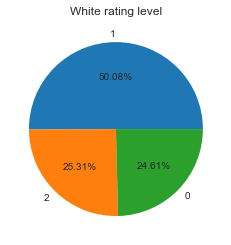

In [11]:
df['white_rating_level'] = [2 if x>1784 else 1 if x>=1392 and x<1784 else 0 for x in df['white_rating']]
plotPie('white_rating_level', 'White rating level')

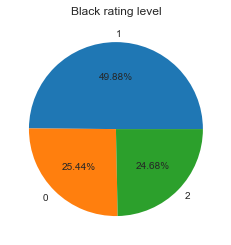

In [12]:
df['black_rating_level'] = [2 if x>1784 else 1 if x>=1392 and x<1784 else 0 for x in df['black_rating']]
plotPie('black_rating_level', 'Black rating level')

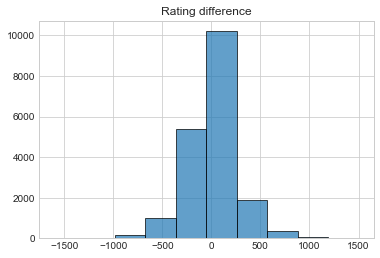

In [13]:
df['rating_diff'] = df['white_rating']-df['black_rating']
plotHist('rating_diff', 'Rating difference')

<function matplotlib.pyplot.show(close=None, block=None)>

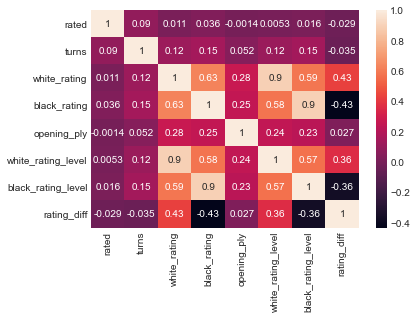

In [14]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show

In [15]:
df.head(5)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,white_rating_level,black_rating_level,rating_diff
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5,1,0,309
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,0,0,61
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,1,1,-4
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,1,1,-15
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5,1,1,54


In [16]:
X = df.copy()
y = X['winner']

X = X.drop(['winner', 'rated', 'turns','victory_status','increment_code', 'opening_eco', 'opening_name', 'opening_ply', 'white_rating', 'black_rating'], axis=1)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame({'winner': y})
X

,white_rating_level,black_rating_level,rating_diff
0,1,0,309
1,0,0,61
2,1,1,-4
3,1,1,-15
4,1,1,54
...,...,...,...
20053,1,0,471
20054,0,0,37
20055,0,0,-67
20056,0,0,133


In [17]:
X = pd.get_dummies(X, columns=['rating_diff'],drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train

,white_rating_level,black_rating_level,rating_diff_-1407,rating_diff_-1290,rating_diff_-1273,rating_diff_-1237,rating_diff_-1223,rating_diff_-1188,rating_diff_-1155,rating_diff_-1141,...,rating_diff_1214,rating_diff_1237,rating_diff_1262,rating_diff_1290,rating_diff_1297,rating_diff_1458,rating_diff_1465,rating_diff_1471,rating_diff_1492,rating_diff_1499
17942,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12394,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12851,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11847,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8245,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8870,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17863,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier();
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Recall : ", recall_score(y_test, y_pred) *  100)
print("Precision : ", precision_score(y_test, y_pred) *  100)

Confusion Matrix:
[[1034  775]
 [ 641 1372]]
Accuracy :  62.95133437990581
Recall :  68.15697963238946
Precision :  63.903120633442015
